### Import Libraries and load Data

In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [5]:
filename = r"C:/Users/Elan/No Show Prediction Project/input/Data_Combined_Cleaned_10.11.18_no_dummies.csv"
df = pd.read_csv(filename, index_col = 0)
df = df.reset_index(drop=True)
df = pd.get_dummies(df)

In [6]:
df.describe()

age    years_edu  monthly_income          bmi    vetstatus  \
count  3108.000000  3108.000000     3108.000000  3108.000000  3108.000000   
mean     38.476892    12.916136     1109.284373    29.519952     0.075611   
std      12.049624     2.141975     1280.730545     6.823645     0.264418   
min      18.000000     0.000000        0.000000    15.188272     0.000000   
25%      28.000000    12.000000      200.000000    24.560602     0.000000   
50%      38.000000    12.000000      800.000000    29.657539     0.000000   
75%      48.000000    14.000000     1500.000000    31.882021     0.000000   
max      66.000000    23.000000    12000.000000    63.872106     1.000000   

             flyer     radio_ad      website     referral  \
count  3108.000000  3108.000000  3108.000000  3108.000000   
mean      0.213320     0.005148     0.041506     0.355534   
std       0.409718     0.071576     0.199489     0.478752   
min       0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     1.000000   
max       1.000000     1.000000     1.000000     1.000000   

       previously_participated     ...       ethnicity_not hispanic  \
count              3108.000000     ...                  3108.000000   
mean                  0.127091     ...                     0.948198   
std                   0.333129     ...                     0.221662   
min                   0.000000     ...                     0.000000   
25%                   0.000000     ...                     1.000000   
50%                   0.000000     ...                     1.000000   
75%                   0.000000     ...                     1.000000   
max                   1.000000     ...                     1.000000   

       ethnicity_unknown  race_african american  race_american indian  \
count        3108.000000            3108.000000           3108.000000   
mean            0.006113               0.249356              0.005792   
std             0.077961               0.432710              0.075893   
min             0.000000               0.000000              0.000000   
25%             0.000000               0.000000              0.000000   
50%             0.000000               0.000000              0.000000   
75%             0.000000               0.000000              0.000000   
max             1.000000               1.000000              1.000000   

        race_asian  race_hawaian  race_more than one race   race_other  \
count  3108.000000   3108.000000              3108.000000  3108.000000   
mean      0.004183      0.002252                 0.027671     0.013192   
std       0.064549      0.047412                 0.164053     0.114114   
min       0.000000      0.000000                 0.000000     0.000000   
25%       0.000000      0.000000                 0.000000     0.000000   
50%       0.000000      0.000000                 0.000000     0.000000   
75%       0.000000      0.000000                 0.000000     0.000000   
max       1.000000      1.000000                 1.000000     1.000000   

       race_unknown   race_white  
count   3108.000000  3108.000000  
mean       0.001287     0.684041  
std        0.035857     0.464971  
min        0.000000     0.000000  
25%        0.000000     0.000000  
50%        0.000000     1.000000  
75%        0.000000     1.000000  
max        1.000000     1.000000  

[8 rows x 52 columns]

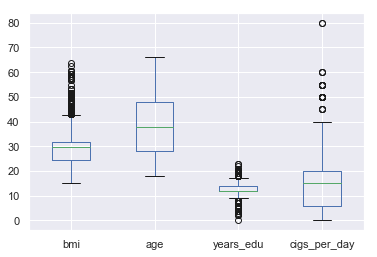

In [7]:
df[['bmi','age','years_edu','cigs_per_day']].plot.box()

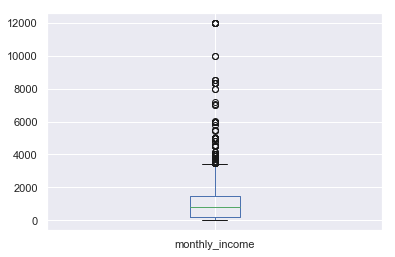

In [8]:
df['monthly_income'].plot.box()

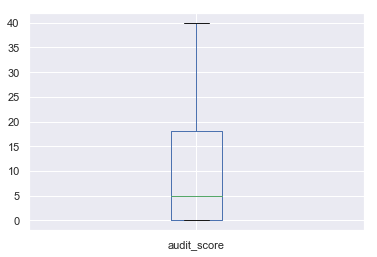

In [9]:
df['audit_score'].plot.box()

In [10]:
features = df[df.columns.difference(['target'])]
labels = df['target']

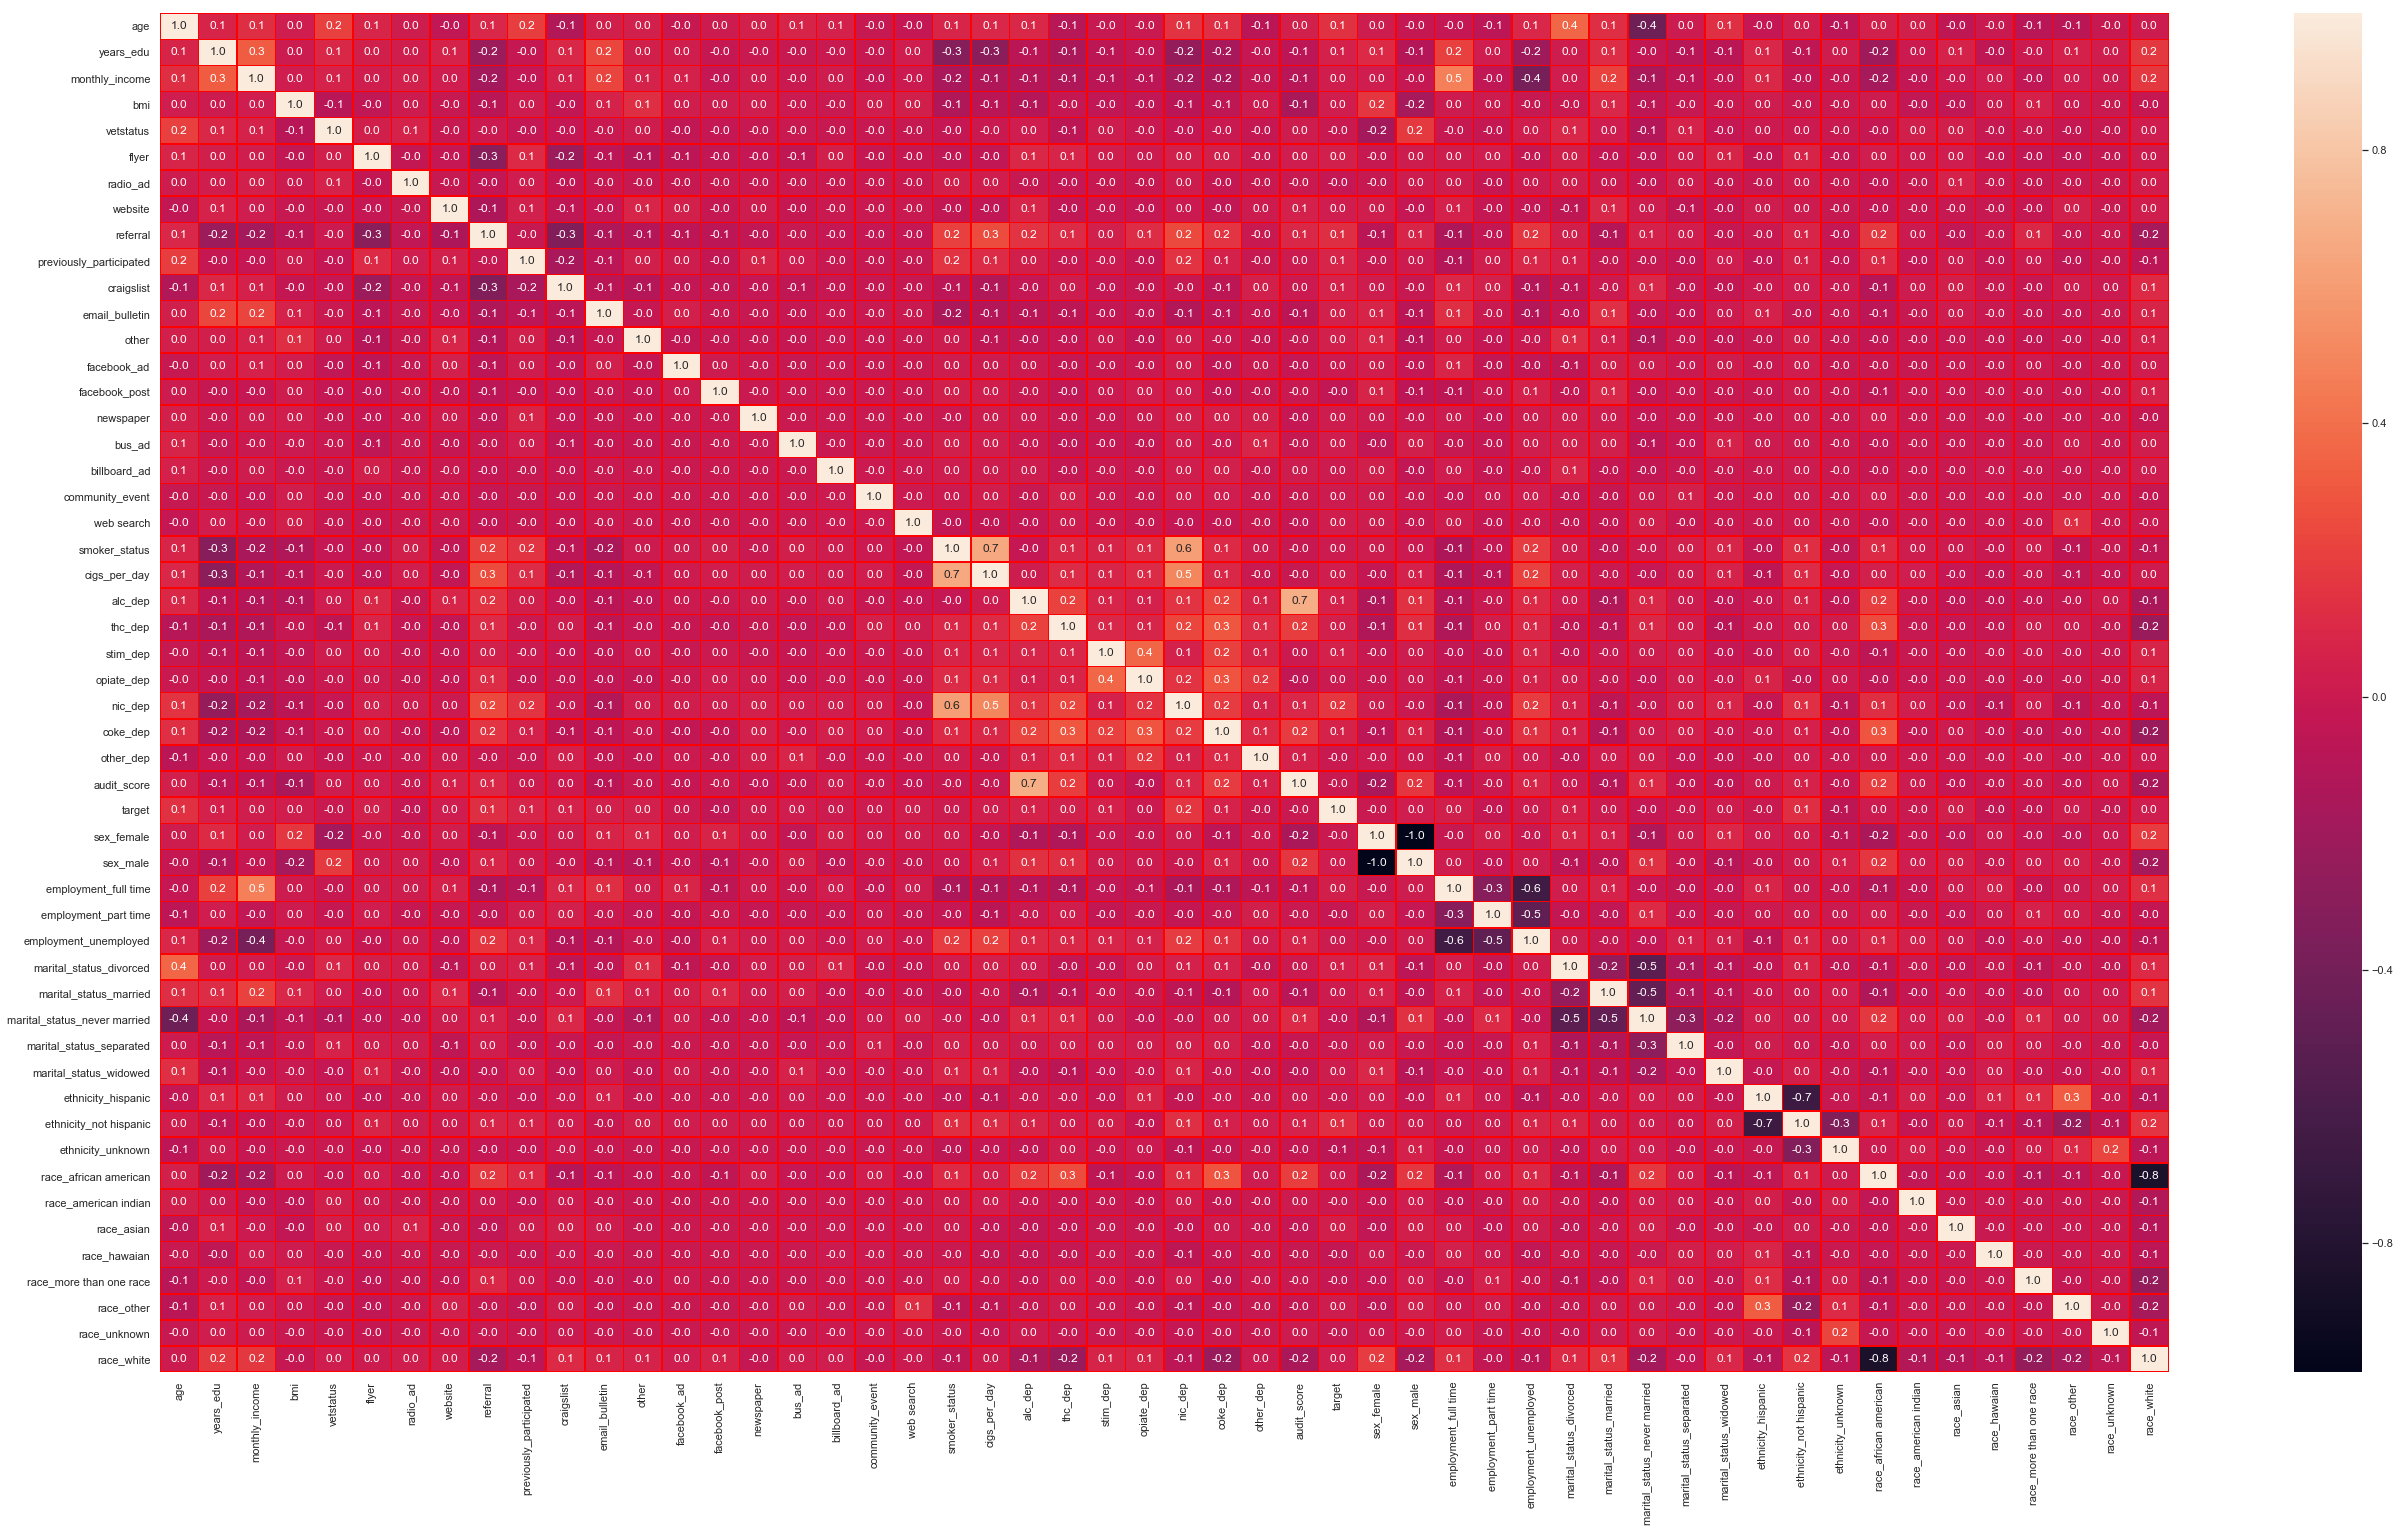

In [11]:
f,ax = plt.subplots(figsize=(45, 25))
corr = df.corr()
sns.heatmap(corr, annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax,xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

In [12]:
df.head()

age  years_edu  monthly_income        bmi  vetstatus  flyer  radio_ad  \
0  37.0       15.0          1000.0  29.657539        0.0    1.0       0.0   
1  40.0       12.0          2000.0  28.202689        0.0    1.0       0.0   
2  40.0       12.0          2000.0  28.202689        0.0    1.0       0.0   
3  40.0       12.0          2000.0  28.202689        0.0    1.0       0.0   
4  52.0       12.0           700.0  29.657539        0.0    0.0       0.0   

   website  referral  previously_participated     ...      \
0      0.0       0.0                      0.0     ...       
1      0.0       0.0                      0.0     ...       
2      0.0       0.0                      0.0     ...       
3      0.0       0.0                      0.0     ...       
4      0.0       0.0                      1.0     ...       

   ethnicity_not hispanic  ethnicity_unknown  race_african american  \
0                       1                  0                      0   
1                       1                  0                      1   
2                       1                  0                      1   
3                       1                  0                      1   
4                       1                  0                      1   

   race_american indian  race_asian  race_hawaian  race_more than one race  \
0                     0           0             0                        0   
1                     0           0             0                        0   
2                     0           0             0                        0   
3                     0           0             0                        0   
4                     0           0             0                        0   

   race_other  race_unknown  race_white  
0           0             0           1  
1           0             0           0  
2           0             0           0  
3           0             0           0  
4           0             0           0  

[5 rows x 52 columns]

In [13]:
labels.sum()

2021

In [14]:
from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size = 0.3,shuffle=True)

In [15]:
print(labels_train.value_counts())
print((labels_train.count()-labels_train.sum())/labels_train.count())

1    1433
0     742
Name: target, dtype: int64
0.3411494252873563


In [16]:
print(labels_test.value_counts())
print((labels_test.count()-labels_test.sum())/labels_test.count())

1    588
0    345
Name: target, dtype: int64
0.36977491961414793


# Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
tree = DecisionTreeClassifier()

tree.fit(features_train,labels_train)
print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.')

# Make probability predictions
train_probs = tree.predict_proba(features_train)[:, 1]
probs = tree.predict_proba(features_test)[:, 1]

train_predictions = tree.predict(features_train)
predictions = tree.predict(features_test)

from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

print(f'Train ROC AUC Score: {roc_auc_score(labels_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(labels_test, probs)}')

Decision tree has 1019 nodes with maximum depth 25.
Train ROC AUC Score: 0.9490353489089483
Test ROC AUC  Score: 0.6301562654047126


In [18]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(labels_test, [1 for _ in range(len(labels_test))])
    baseline['precision'] = precision_score(labels_test, [1 for _ in range(len(labels_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(labels_test, predictions)
    results['precision'] = precision_score(labels_test, predictions)
    results['roc'] = roc_auc_score(labels_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(labels_train, train_predictions)
    train_results['precision'] = precision_score(labels_train, train_predictions)
    train_results['roc'] = roc_auc_score(labels_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(labels_test, [1 for _ in range(len(labels_test))])
    model_fpr, model_tpr, _ = roc_curve(labels_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

Recall Baseline: 1.0 Test: 0.68 Train: 0.87
Precision Baseline: 0.63 Test: 0.71 Train: 0.91
Roc Baseline: 0.5 Test: 0.63 Train: 0.95


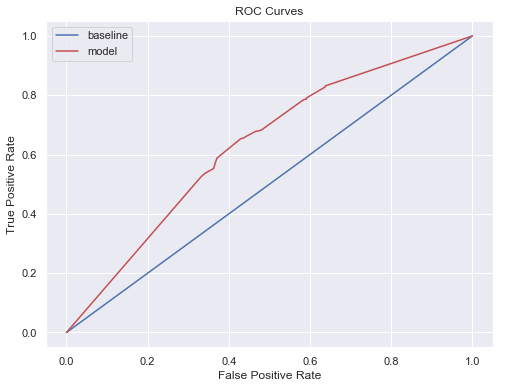

In [19]:
evaluate_model(predictions, probs, train_predictions, train_probs)

## Our model severely overfits the training data

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

Confusion matrix, without normalization
[[179 166]
 [186 402]]


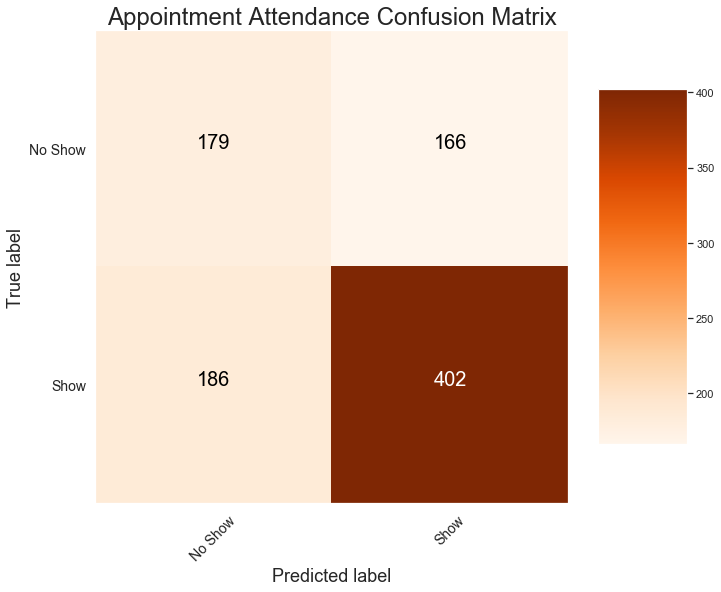

In [21]:
cm = confusion_matrix(labels_test, predictions)
plot_confusion_matrix(cm, classes = ['No Show', 'Show'],
                      title = 'Appointment Attendance Confusion Matrix')

In [22]:
from pandas import DataFrame
VI = DataFrame(tree.feature_importances_, columns = ["Importance"], index=features.columns)

In [23]:
VI.sort_values(['Importance'],ascending=0)

Importance
bmi                             0.114483
age                             0.109977
monthly_income                  0.104134
cigs_per_day                    0.074908
referral                        0.058030
craigslist                      0.055435
audit_score                     0.054893
years_edu                       0.051735
nic_dep                         0.041986
ethnicity_not hispanic          0.032875
alc_dep                         0.032079
smoker_status                   0.027073
flyer                           0.024558
marital_status_never married    0.019050
race_african american           0.016187
previously_participated         0.014656
other                           0.014467
email_bulletin                  0.013899
marital_status_divorced         0.013729
website                         0.013220
thc_dep                         0.008921
coke_dep                        0.008767
employment_part time            0.008613
radio_ad                        0.007526
employment_full time            0.007424
marital_status_separated        0.007400
sex_male                        0.007325
race_more than one race         0.007006
vetstatus                       0.005566
web search                      0.005547
other_dep                       0.005509
stim_dep                        0.005327
opiate_dep                      0.005075
sex_female                      0.004539
facebook_post                   0.004497
bus_ad                          0.003122
race_other                      0.002756
marital_status_married          0.002638
race_hawaian                    0.002477
employment_unemployed           0.001955
marital_status_widowed          0.000449
race_white                      0.000187
community_event                 0.000000
race_unknown                    0.000000
race_asian                      0.000000
race_american indian            0.000000
newspaper                       0.000000
facebook_ad                     0.000000
ethnicity_unknown               0.000000
ethnicity_hispanic              0.000000
billboard_ad                    0.000000

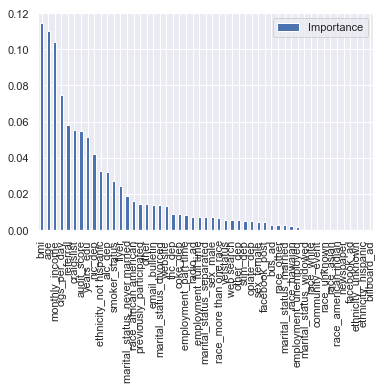

In [24]:
VI.sort_values(['Importance'],ascending=0).plot.bar()

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = pd.DataFrame()
    vif["Features"] = features.columns
    vif["VIF"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]    
    return(vif)

vif = calculate_vif(features)
while vif['VIF'][vif['VIF'] > 10].any():
    remove = vif.sort_values('VIF',ascending=0)['Features'][:1]
    features.drop(remove,axis=1,inplace=True)
    vif = calculate_vif(features)

c:\python36\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [26]:
vif.sort_values(['VIF'],ascending=0)

Features       VIF
3                        bmi  7.964149
23                   nic_dep  4.427545
5               cigs_per_day  3.684834
1                audit_score  3.433668
0                    alc_dep  3.246324
36                  referral  3.007183
21            monthly_income  2.558491
37                sex_female  2.263426
10      employment_full time  2.131072
8                 craigslist  2.053598
16                     flyer  1.996693
28     race_african american  1.759199
6                   coke_dep  1.648592
17   marital_status_divorced  1.569773
18    marital_status_married  1.547807
39                   thc_dep  1.529394
11      employment_part time  1.418107
24                opiate_dep  1.393315
27   previously_participated  1.279101
25                     other  1.258122
38                  stim_dep  1.248286
12        ethnicity_hispanic  1.221209
9             email_bulletin  1.207490
33                race_other  1.194971
19  marital_status_separated  1.168525
40                 vetstatus  1.167178
42                   website  1.149312
20    marital_status_widowed  1.120733
32   race_more than one race  1.110571
13         ethnicity_unknown  1.097037
14               facebook_ad  1.089851
26                 other_dep  1.086440
15             facebook_post  1.074820
34              race_unknown  1.062638
4                     bus_ad  1.061008
35                  radio_ad  1.046443
22                 newspaper  1.045097
41                web search  1.037766
29      race_american indian  1.027404
30                race_asian  1.024667
31              race_hawaian  1.023788
2               billboard_ad  1.022766
7            community_event  1.022048

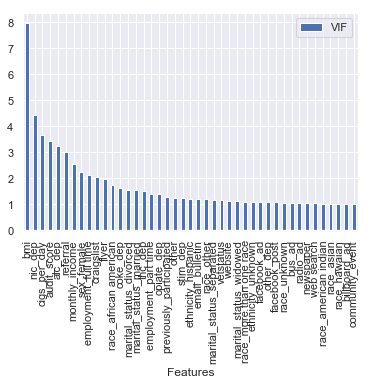

In [27]:
vif.sort_values(['VIF'],ascending=0).plot.bar(x='Features')

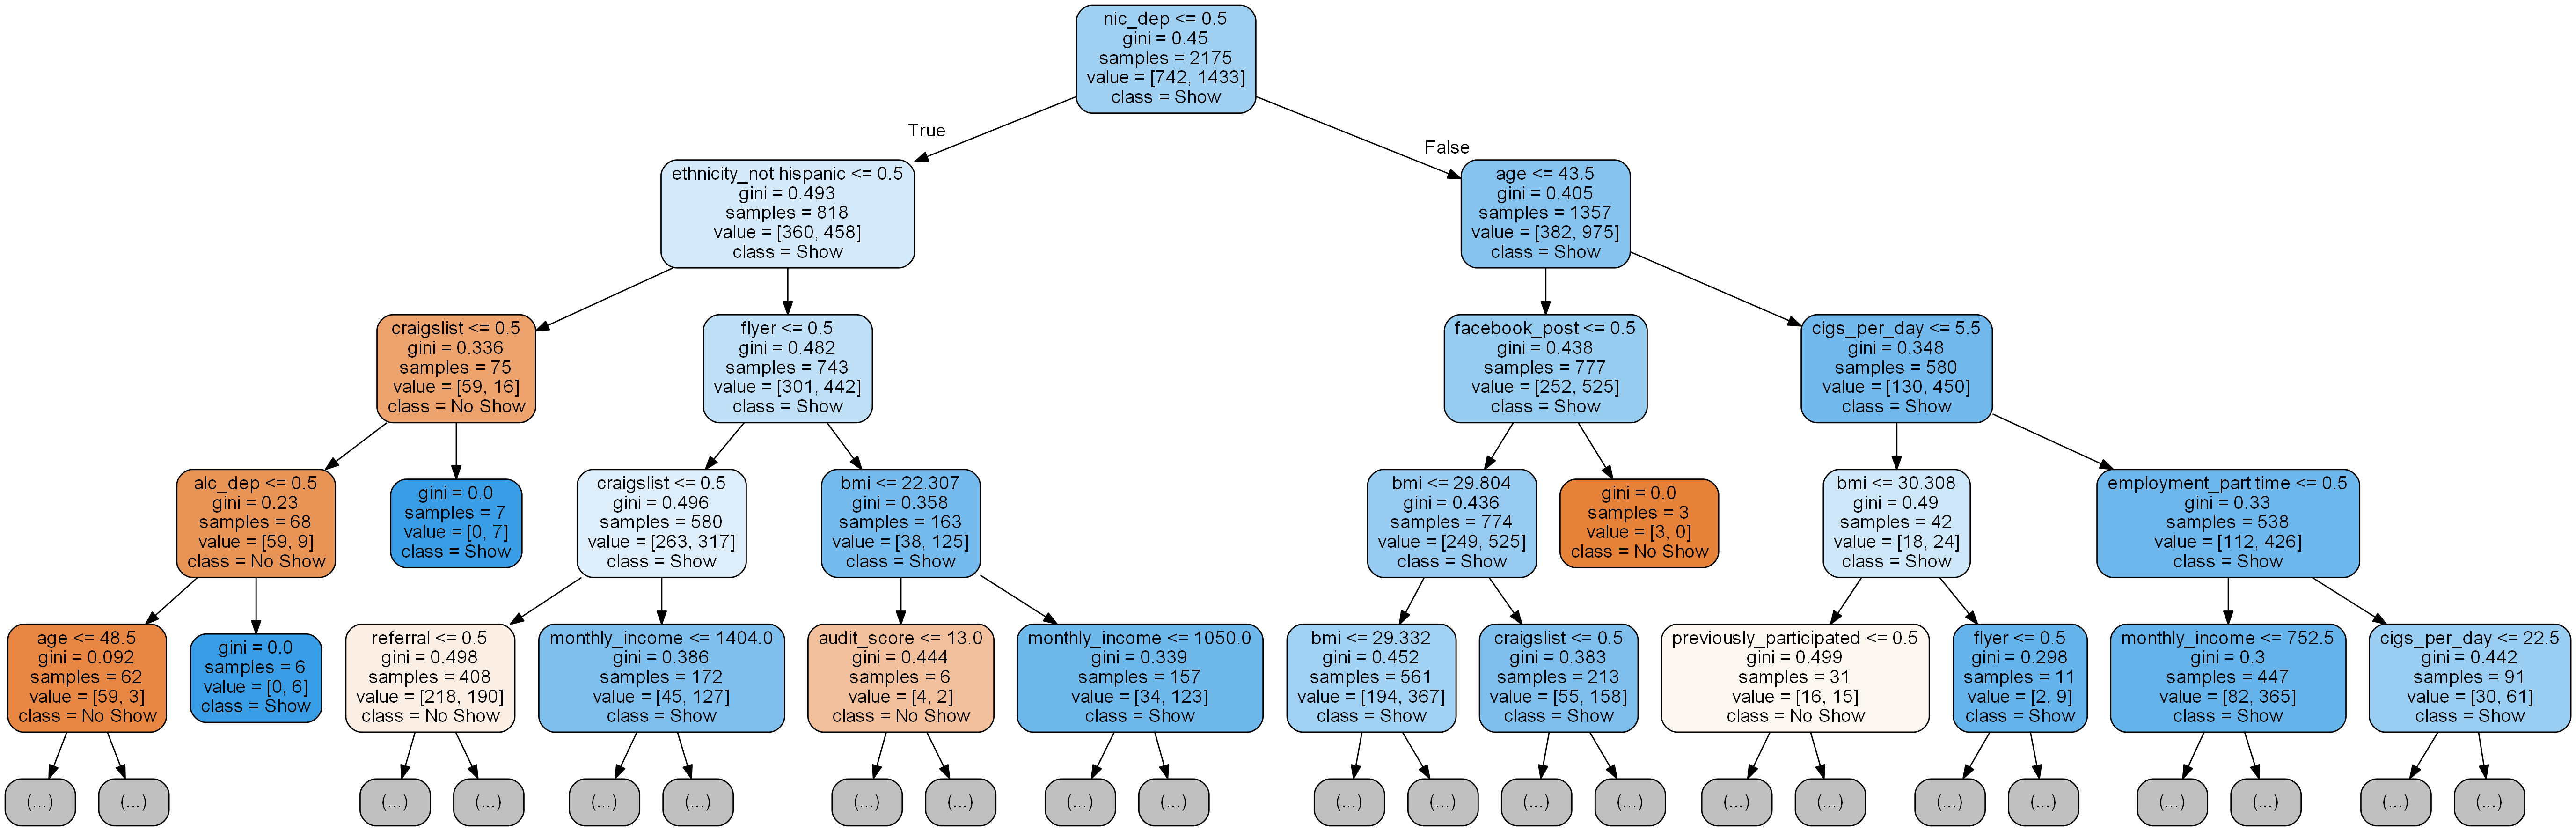

In [28]:
features_list = list(features_train.columns)
# Save tree as dot file
export_graphviz(tree, 'tree_real_data.dot', rounded = True, 
                feature_names = features_list, max_depth = 4,
                class_names = ['No Show', 'Show'], filled = True)

# Convert to png
call(['dot', '-Tpng', 'tree_real_data.dot', '-o', 'tree_real_data.png', '-Gdpi=200'])

# Visualize
Image(filename='tree_real_data.png')

# Random Forest Classification

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.fit(features_train,labels_train)

pred_train = clf.predict(features_train)
train_rf_probs = clf.predict_proba(features_train)[:, 1]

pred_test = clf.predict(features_test)
rf_probs = clf.predict_proba(features_test)[:, 1]

from sklearn.metrics import accuracy_score
accuracy_train = accuracy_score(pred_train,labels_train)
accuracy_test = accuracy_score(pred_test,labels_test)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(np.array(labels_train), clf.predict_proba(features_train)[:,1])
auc_train = metrics.auc(fpr,tpr)


n_nodes = []
max_depths = []

for ind_tree in clf.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 1009
Average maximum depth 24


In [30]:
accuracy_train

0.8588505747126437

In [31]:
accuracy_test

0.6580921757770632

In [32]:
auc_train

0.9473462455068533

Recall Baseline: 1.0 Test: 0.82 Train: 0.92
Precision Baseline: 0.63 Test: 0.69 Train: 0.87
Roc Baseline: 0.5 Test: 0.66 Train: 0.95


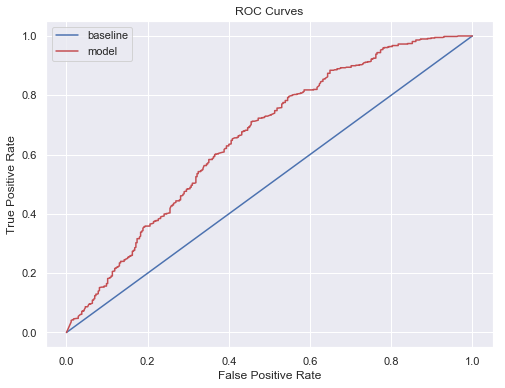

In [33]:
evaluate_model(pred_test, rf_probs, pred_train, train_rf_probs)

Confusion matrix, without normalization
[[132 213]
 [106 482]]


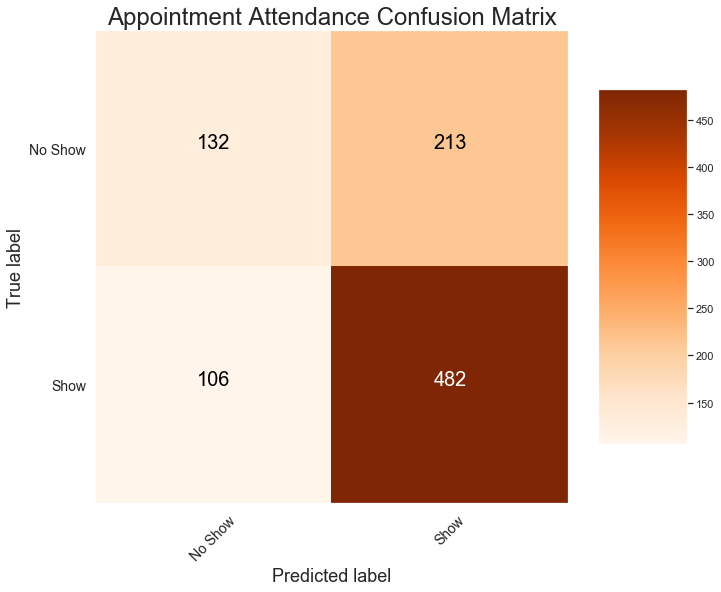

In [34]:
cm = confusion_matrix(labels_test, pred_test)
plot_confusion_matrix(cm, classes = ['No Show', 'Show'],
                      title = 'Appointment Attendance Confusion Matrix')

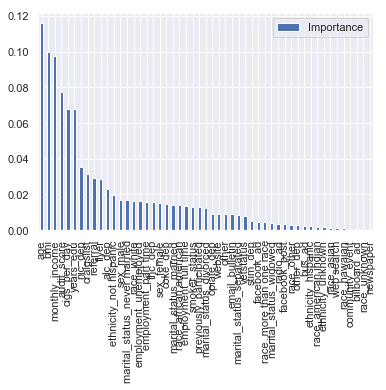

In [35]:
VI = DataFrame(clf.feature_importances_, columns = ["Importance"], index=features_train.columns)
VI.sort_values(['Importance'],ascending=0).plot.bar()

# Optimization of our Random Forest using Random Search

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(3, 10, num = 1)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(features_train, labels_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    3.6s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [3, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [37]:
y_pred = rf_random.predict(features_test)
print("Accuracy:",metrics.accuracy_score(labels_test, y_pred))
print(metrics.classification_report(y_pred, labels_test))

Accuracy: 0.6934619506966774
              precision    recall  f1-score   support

           0       0.36      0.66      0.46       187
           1       0.89      0.70      0.79       746

   micro avg       0.69      0.69      0.69       933
   macro avg       0.62      0.68      0.62       933
weighted avg       0.78      0.69      0.72       933



In [38]:
rf_random.best_params_

{'n_estimators': 118,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': True}

In [39]:
best_model = rf_random.best_estimator_

In [40]:
train_rf_predictions = best_model.predict(features_train)
train_rf_probs = best_model.predict_proba(features_train)[:, 1]

rf_predictions = best_model.predict(features_test)
rf_probs = best_model.predict_proba(features_test)[:, 1]

In [41]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 523
Average maximum depth 22


Recall Baseline: 1.0 Test: 0.89 Train: 0.95
Precision Baseline: 0.63 Test: 0.7 Train: 0.83
Roc Baseline: 0.5 Test: 0.67 Train: 0.93


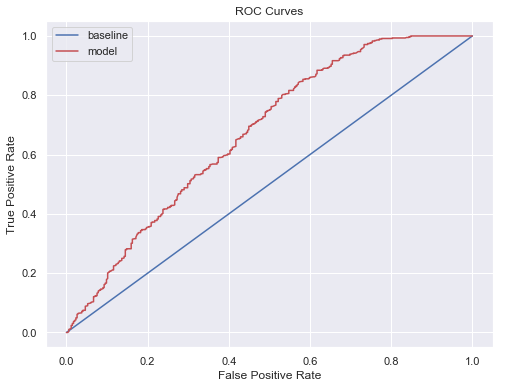

In [42]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

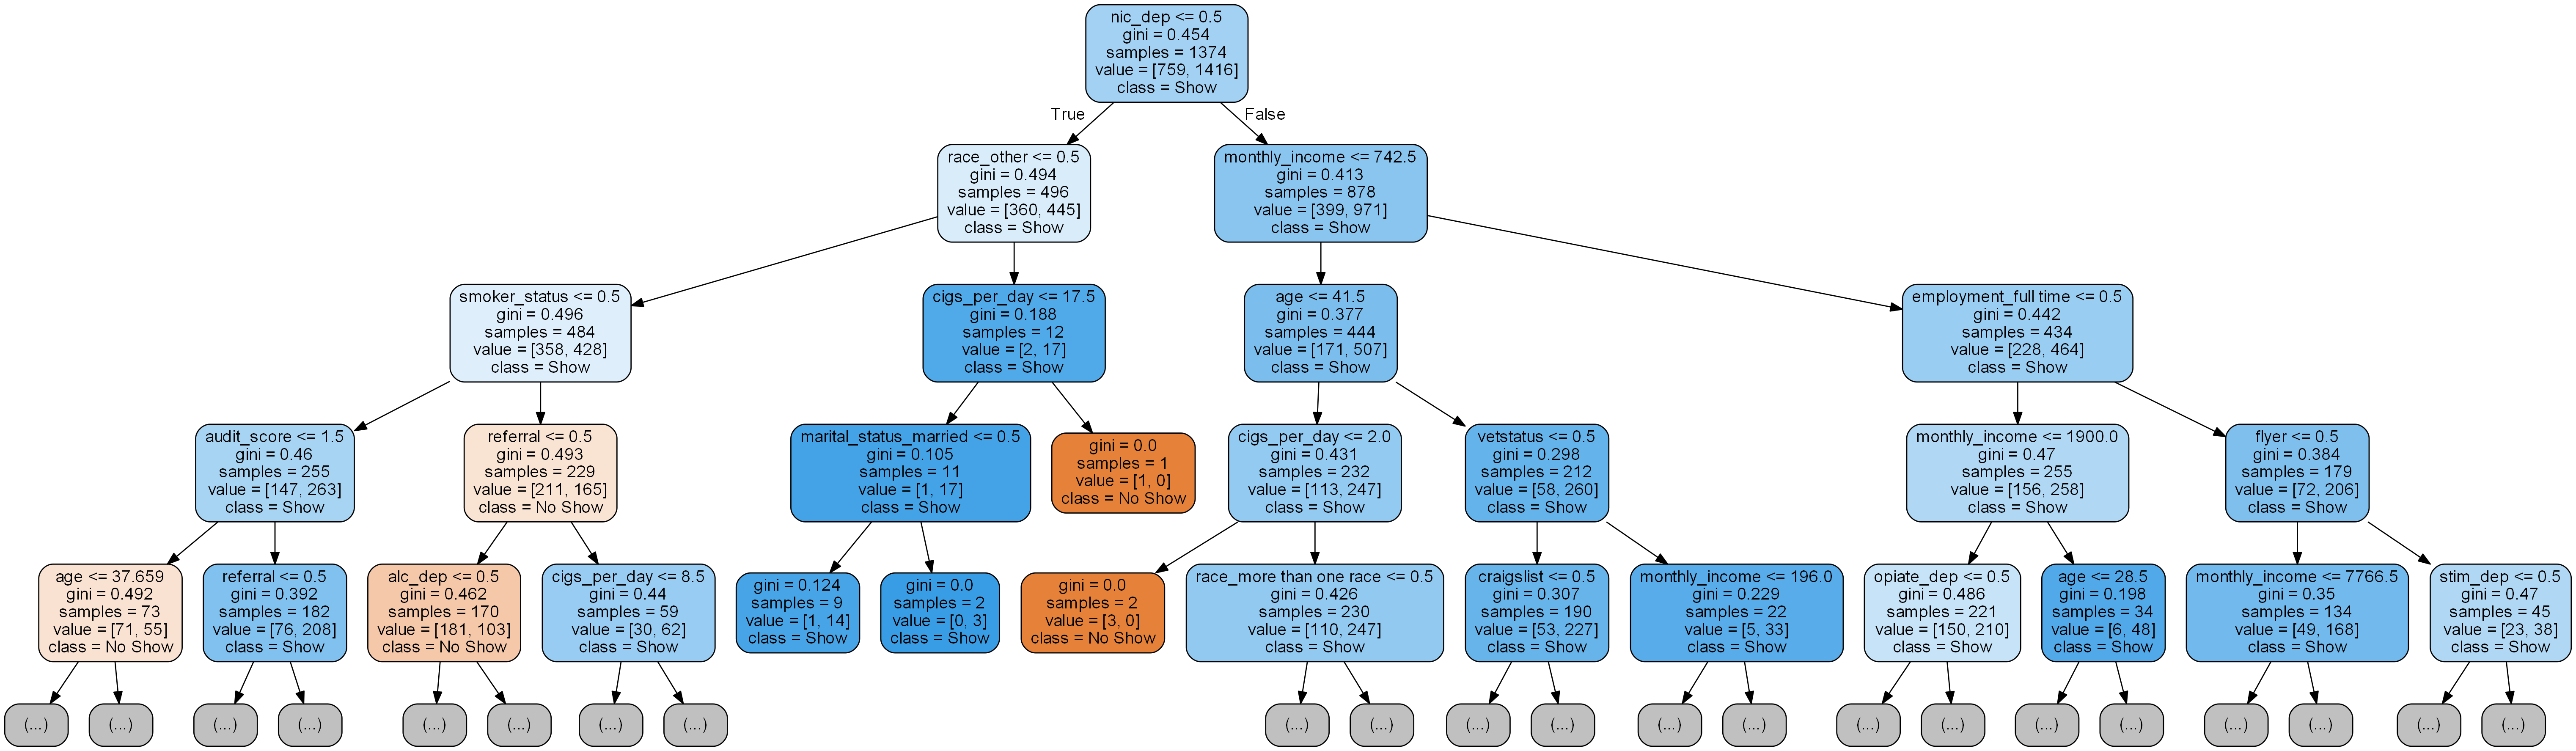

In [43]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=features_train.columns, max_depth = 4, 
                class_names = ['No Show', 'Show'], filled = True)

call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

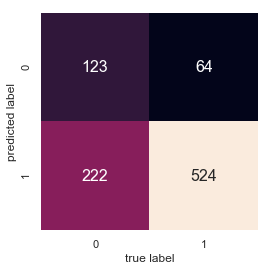

In [44]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(labels_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [45]:
pd.crosstab(labels_train,pd.Series(pred_train),rownames=['ACTUAL'],colnames=['PRED'])

PRED      0    1
ACTUAL          
0       158  339
1       300  718

In [46]:
from ipywidgets import interact
from bokeh.plotting import figure
from bokeh.io import push_notebook, show, output_notebook
output_notebook()
from sklearn import metrics
preds = clf.predict_proba(features_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(labels_train), preds)
auc = metrics.auc(fpr,tpr)
p = figure(title="ROC Curve - Train data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

Loading BokehJS ...

In [47]:
preds = clf.predict_proba(features_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(np.array(labels_test), preds)
auc = metrics.auc(fpr,tpr)
p = figure(title="ROC Curve - Test data")
r = p.line(fpr,tpr,color='#0077bc',legend = 'AUC = '+ str(round(auc,3)), line_width=2)
s = p.line([0,1],[0,1], color= '#d15555',line_dash='dotdash',line_width=2)
show(p)

# Naive Bayes

In [48]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

clf =  MultinomialNB().fit(features_train, labels_train)
print('Accuracy:', round(accuracy_score(labels_test, 
                                        clf.predict(features_test)), 2) * 100, '%')

Accuracy: 63.0 %


# SVM

In [49]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
X = scaler.transform(features)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=1)

from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

c:\python36\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python36\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  """
c:\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score:
0.6430868167202572


# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

model.fit(features_test,labels_test)
model.score(features_test,labels_test)


0.6913183279742765

# Try feature selection

In [51]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True, random_state=0)

In [52]:
feat_labels = features.columns

# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf.fit(X_train, y_train)

# Print the name and gini importance of each feature
VI = DataFrame(clf.feature_importances_, columns = ["Importance"], index=X_train.columns)
VI.sort_values(['Importance'],ascending=0)

Importance
bmi                         0.136475
monthly_income              0.133997
audit_score                 0.108105
cigs_per_day                0.092460
nic_dep                     0.053799
craigslist                  0.041202
referral                    0.037770
flyer                       0.036917
sex_female                  0.030419
alc_dep                     0.028809
race_african american       0.022727
marital_status_married      0.021685
marital_status_divorced     0.021670
employment_full time        0.021019
employment_part time        0.019438
thc_dep                     0.019127
coke_dep                    0.017513
previously_participated     0.016579
website                     0.015404
email_bulletin              0.013219
marital_status_separated    0.013203
vetstatus                   0.012232
other                       0.011134
opiate_dep                  0.010044
race_more than one race     0.008617
facebook_ad                 0.007928
stim_dep                    0.007360
marital_status_widowed      0.005743
ethnicity_hispanic          0.005425
facebook_post               0.004726
race_other                  0.003692
other_dep                   0.003660
ethnicity_unknown           0.003443
radio_ad                    0.003342
bus_ad                      0.002033
race_american indian        0.001721
web search                  0.001695
race_hawaian                0.001603
race_asian                  0.001442
newspaper                   0.001067
billboard_ad                0.000719
community_event             0.000704
race_unknown                0.000131

In [53]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.01
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=0.03)

In [54]:
important_features = []
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    important_features.append(feat_labels[feature_list_index])
print(important_features)

['audit_score', 'bmi', 'cigs_per_day', 'craigslist', 'flyer', 'monthly_income', 'nic_dep', 'referral', 'sex_female']


In [55]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [56]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [57]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)
# View The Accuracy Of Our Full Feature Model
accuracy_score(y_test, y_pred)

0.707395498392283

In [58]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)
important_probs = clf_important.predict_proba(X_important_test)[:, 1]
# View The Accuracy Of Our Limited Feature Model
accuracy_score(y_test, y_important_pred)

0.6966773847802786

In [59]:
pred_important_train = clf_important.predict(X_important_train)
train_important_probs = clf_important.predict_proba(X_important_train)[:, 1]

fpr, tpr, _ = metrics.roc_curve(np.array(y_train), clf_important.predict_proba(X_important_train)[:,1])
auc_train = metrics.auc(fpr,tpr)


n_nodes = []
max_depths = []

for ind_tree in clf_important.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 993
Average maximum depth 21


Recall Baseline: 1.0 Test: 0.82 Train: 0.94
Precision Baseline: 0.67 Test: 0.75 Train: 0.85
Roc Baseline: 0.5 Test: 0.68 Train: 0.94


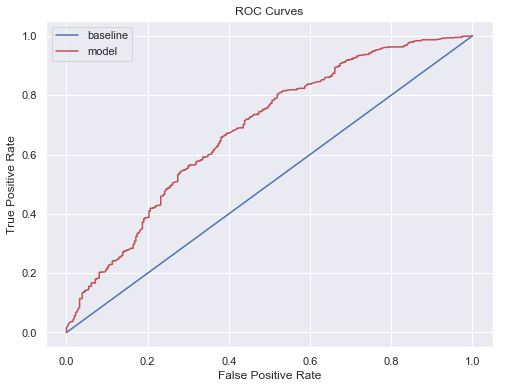

In [60]:
def evaluate_model_important(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

evaluate_model_important(y_important_pred, important_probs, pred_important_train, train_important_probs)

Confusion matrix, without normalization
[[142 168]
 [115 508]]


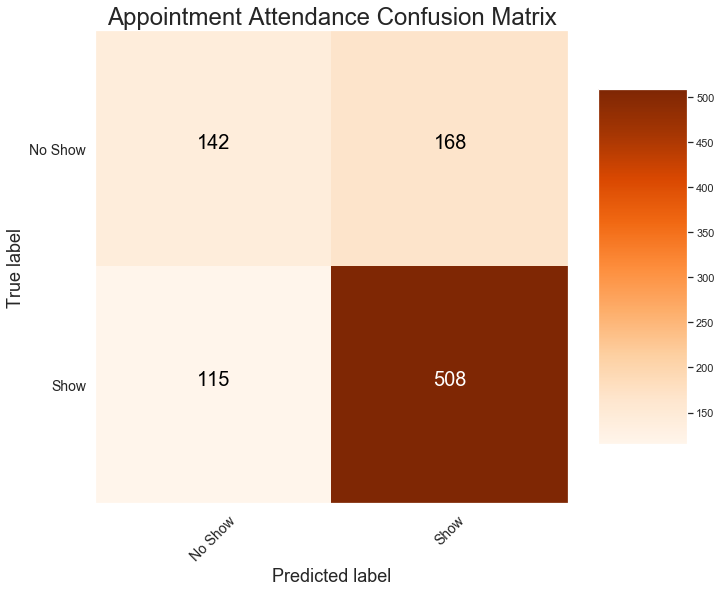

In [61]:
cm = confusion_matrix(y_test, y_important_pred)
plot_confusion_matrix(cm, classes = ['No Show', 'Show'],
                      title = 'Appointment Attendance Confusion Matrix')

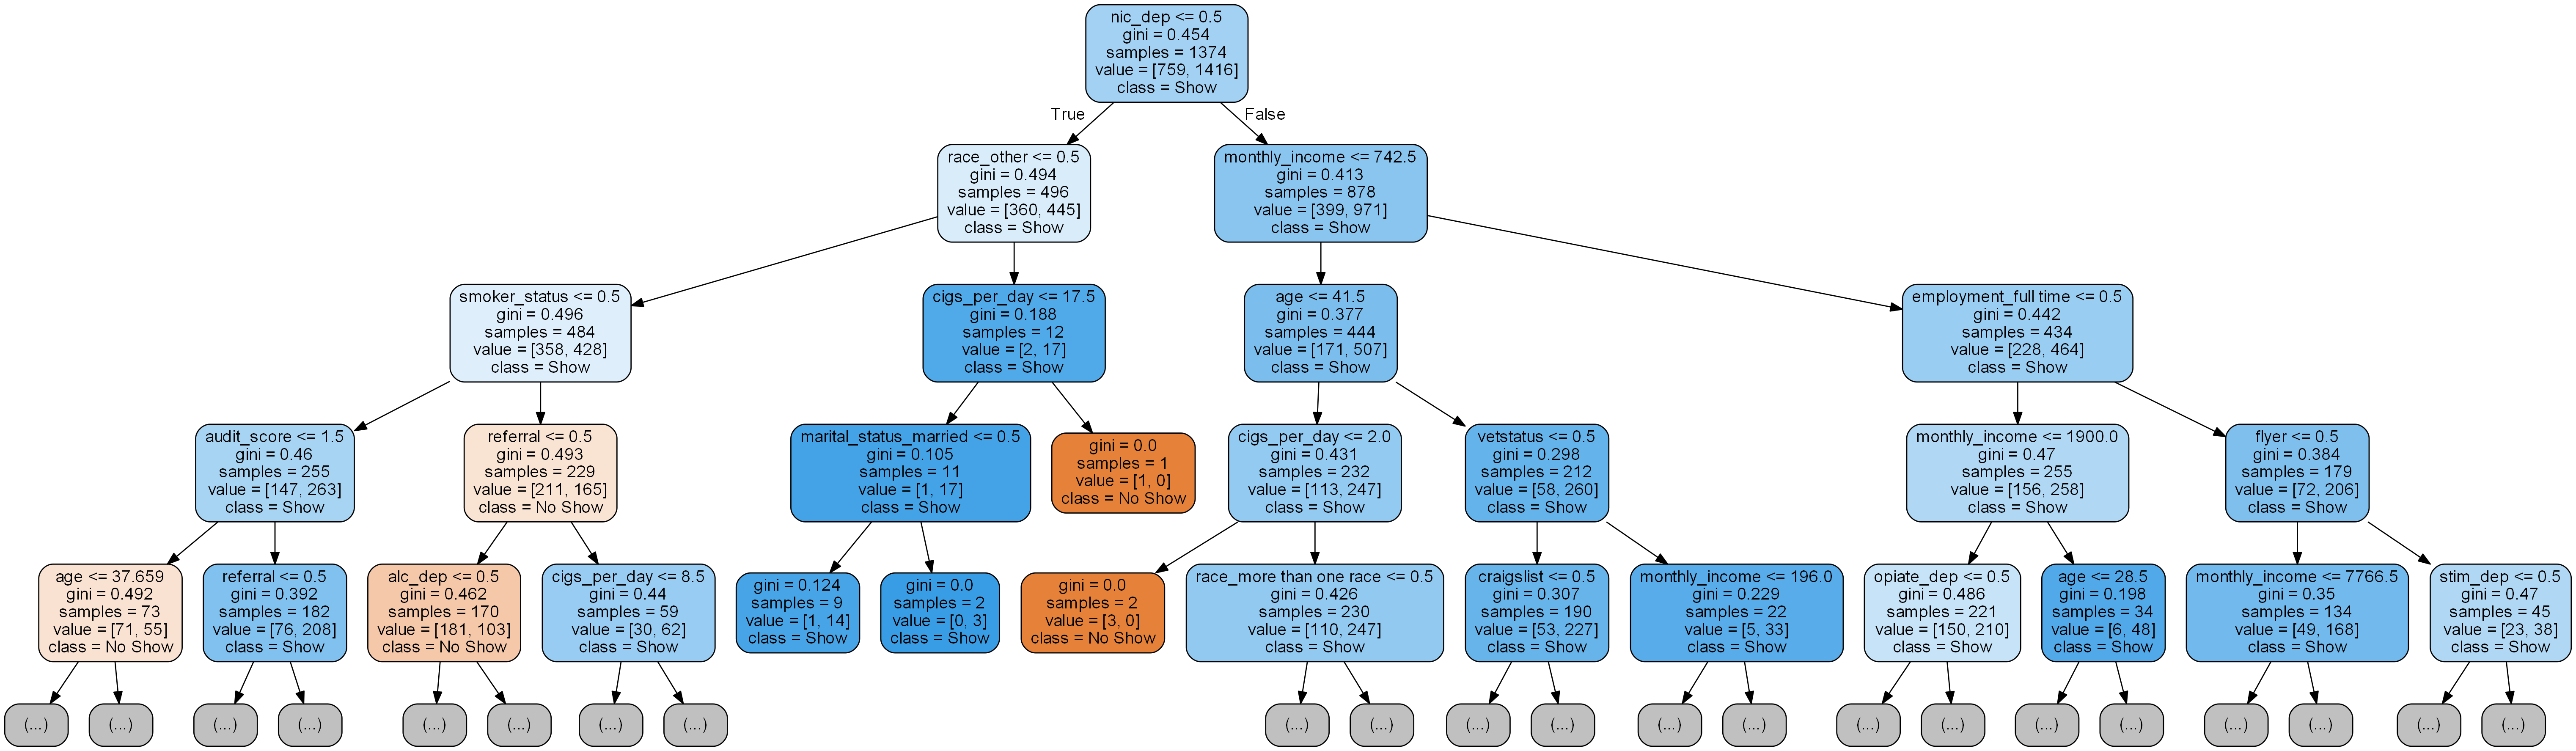

In [62]:
estimator = clf_important.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_feature_selection.dot', rounded = True, 
                feature_names=important_features, max_depth = 6, 
                class_names = ['No Show', 'Show'], filled = True)

call(['dot', '-Tpng', 'tree_from_feature_selection.dot', '-o', 'tree_from_feature_selection.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')